# **HW4**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pandas as pd
import pyclustering
import numpy as np
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.target)

#data_cols = ['alcohol', 'malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Looks like there's three classes here.  REMEMBER: Python starts with a zero, i.e. 1, 2, 3 is 0, 1, 2.

In [2]:
X = wine.data
y = wine.target
#
print(np.shape(X))
print(np.shape(y))

(178, 13)
(178,)


So now I know there are 13 colums and 178 data points.

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8675309)

Splitting the data so I have 80% to train with and 20% to reserve for testing.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2500,random_state=8675309)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2500,
              random_state=8675309)

Got the data scaled and transformed.  I don't know how many layers to run so I'm just going to default to 10 since I saw Dr. Clayton do that in her code.  I'll change the max iterations and run with a random state number that's easy to remember... and hum to.

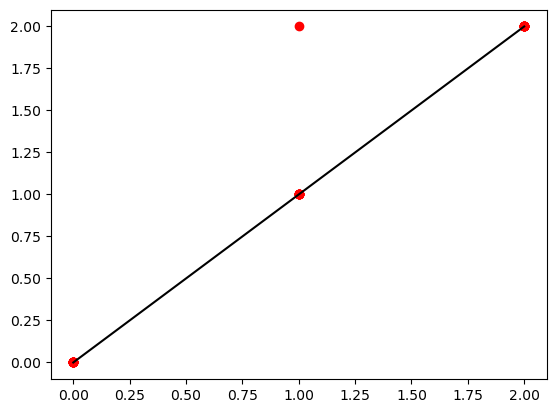

In [6]:
predictions = mlp.predict(X_test)

plt.plot(y_test, predictions, 'ro')
plt.plot([0, 2], [0, 2],'k')

Plot looks pretty good.  I need to remember that python starts at zero, so that's why the plot numbers end at "2".

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[15  0  0]
 [ 0  9  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



The confusion matrix is in line with what we can observe in the plot.  The model is very good at predicting class-0 and class-1 (Precision is 100%), and mostly good at predicting class-2 (Precision 92%).  It is also perfect at predicting when something is not going to be in class-1, but 95% and 96% as capable when predicting the other two classes. We should run the model with different layers to see if I can achieve a better result.

In [8]:

scores = {}
scores_list = []
l_range = range(1, 7, 1)

from sklearn import metrics

for l in l_range:
    print(l)
    mlp = MLPClassifier(hidden_layer_sizes=(l), max_iter=2500,random_state=8675309)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores[l] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
scores

1
2
3
4
5
6


{1: 0.5555555555555556,
 2: 0.9444444444444444,
 3: 0.9722222222222222,
 4: 0.9722222222222222,
 5: 0.9722222222222222,
 6: 0.9722222222222222}

Confusion matrix is promising though I don't like that first number. Lets plot the result.

Text(0, 0.5, 'accuracy score')

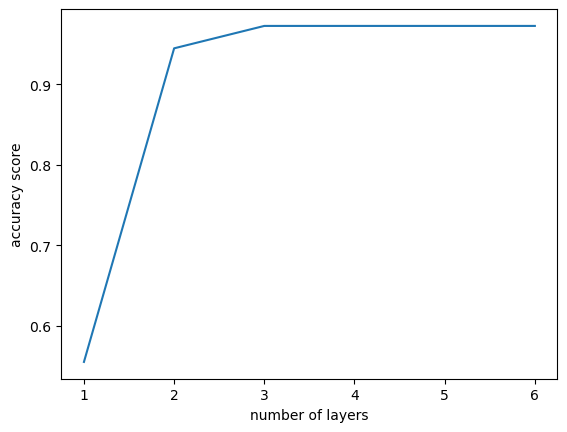

In [9]:
plt.plot(l_range,scores_list)
plt.xlabel('number of layers')
plt.ylabel('accuracy score')

It's got an elbow at the "3" layer mark.  Noice!  Now to run MLPClassifier with three layers and use the "loop" trick that Steele, AKA Zach_Alpha, showed me. Two loops to start.

In [10]:
scores = {}
scores_list = []
a = range(3, 7, 1)
b = range(3, 7, 1)

from sklearn import metrics

for ticks_1 in a:
    for ticks_2 in b:
        mlp = MLPClassifier(hidden_layer_sizes=(ticks_1,ticks_2), max_iter=2500,random_state=8675309)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        scores[ticks_1, ticks_2] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))
scores

{(3, 3): 0.9722222222222222,
 (3, 4): 1.0,
 (3, 5): 1.0,
 (3, 6): 0.9444444444444444,
 (4, 3): 0.9722222222222222,
 (4, 4): 1.0,
 (4, 5): 0.9722222222222222,
 (4, 6): 0.9722222222222222,
 (5, 3): 1.0,
 (5, 4): 0.9722222222222222,
 (5, 5): 0.9722222222222222,
 (5, 6): 0.9722222222222222,
 (6, 3): 0.9722222222222222,
 (6, 4): 0.9722222222222222,
 (6, 5): 1.0,
 (6, 6): 0.9722222222222222}

Look at all the 1's! I'mma run one more time with an extra loop just to be sure.

In [11]:
scores = {}
scores_list = []
a = range(3, 7, 1)
b = range(3, 7, 1)
c = range(3, 7, 1)

from sklearn import metrics

for ticks_1 in a:
    for ticks_2 in b:
        for ticks_3 in c:
            mlp = MLPClassifier(hidden_layer_sizes=(ticks_1,ticks_2,ticks_3), max_iter=2500,random_state=8675309)
            mlp.fit(X_train, y_train)
            y_pred = mlp.predict(X_test)
            scores[ticks_1, ticks_2, ticks_3] = metrics.accuracy_score(y_test,y_pred)
            scores_list.append(metrics.accuracy_score(y_test,y_pred))
scores

{(3, 3, 3): 1.0,
 (3, 3, 4): 1.0,
 (3, 3, 5): 1.0,
 (3, 3, 6): 0.9722222222222222,
 (3, 4, 3): 0.9722222222222222,
 (3, 4, 4): 0.9722222222222222,
 (3, 4, 5): 0.9722222222222222,
 (3, 4, 6): 0.9722222222222222,
 (3, 5, 3): 1.0,
 (3, 5, 4): 1.0,
 (3, 5, 5): 0.9722222222222222,
 (3, 5, 6): 0.9722222222222222,
 (3, 6, 3): 0.9722222222222222,
 (3, 6, 4): 0.9722222222222222,
 (3, 6, 5): 1.0,
 (3, 6, 6): 1.0,
 (4, 3, 3): 0.6666666666666666,
 (4, 3, 4): 1.0,
 (4, 3, 5): 0.9444444444444444,
 (4, 3, 6): 1.0,
 (4, 4, 3): 0.9722222222222222,
 (4, 4, 4): 0.9722222222222222,
 (4, 4, 5): 0.9444444444444444,
 (4, 4, 6): 0.9444444444444444,
 (4, 5, 3): 0.9722222222222222,
 (4, 5, 4): 0.9166666666666666,
 (4, 5, 5): 1.0,
 (4, 5, 6): 0.9444444444444444,
 (4, 6, 3): 0.9722222222222222,
 (4, 6, 4): 0.9444444444444444,
 (4, 6, 5): 1.0,
 (4, 6, 6): 0.9444444444444444,
 (5, 3, 3): 1.0,
 (5, 3, 4): 0.9722222222222222,
 (5, 3, 5): 0.9722222222222222,
 (5, 3, 6): 0.9722222222222222,
 (5, 4, 3): 0.97222222222222

Looks like 3 layers is where it's at. Let's set things up again and run it using the unknown wine dataset.

In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(3,3,3), max_iter=2500,random_state=8675309)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(3, 3, 3), max_iter=2500, random_state=8675309)

In [13]:
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[15  0  0]
 [ 0 10  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



The confusion matrix backs up the information observed from the scores of the last run with 3 layers and 3 loops.  The model is perfectly predicting all three classes.  The implications here are that this model is likely to report accurately when given new data from the unknown_wine dataset.

In [14]:
classes = {0:'0',1:'1',2:'2'}
mystery = pd.read_csv("unknown_wine.csv")
mystery_cols = ['alcohol', 'malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

In [15]:
mystery

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,2.480115,1.577093,1.766757,7.542816,43.456511,0.569810,0.075239,0.267335,0.744527,0.975456,0.741519,2.763938,1228.781864
1,1.074171,1.125832,2.557246,4.421963,57.339151,1.677453,1.027255,0.266734,1.037521,6.093875,0.400008,2.629353,620.263632
2,3.516777,0.819709,0.462774,2.328977,60.776751,0.950360,2.312480,0.114245,1.453748,1.566772,0.249111,0.948954,417.939695
3,13.189798,1.402826,0.153316,7.621558,0.440191,0.103332,2.878385,0.016165,1.558074,5.961709,0.338151,1.608835,233.606713
4,11.973053,1.838887,0.945975,1.269000,83.484182,0.934233,0.448263,0.038872,0.488293,4.358916,0.482324,0.084788,387.198226
5,2.284138,0.048992,0.211198,4.088945,18.957613,1.192519,1.647511,0.005231,1.038589,2.101098,0.237541,1.672787,121.134473
6,9.463899,0.787199,1.863438,16.869074,31.736868,1.470403,0.534720,0.206582,0.633736,4.444610,0.033384,0.925355,328.508943
7,6.453939,1.676532,2.153574,13.765152,70.390073,1.749210,2.721021,0.252128,0.152867,0.582114,0.507068,2.055239,59.729064
8,12.740552,2.854646,0.932969,8.626371,44.557706,0.405552,1.105890,0.219005,0.393723,2.706763,0.983953,1.070769,250.301469
9,9.686586,1.232883,1.475132,3.560106,12.221049,1.229565,1.495698,0.153813,0.886209,1.506817,0.939698,0.921325,187.457035


In [16]:
mystery_scaled = scaler.transform(mystery)


C:\Users\Brian\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


I think I can ignore this warning.  Yeah, I just need the classes and I'm going to give them the most unimaginative names possible.

In [17]:
predictions = mlp.predict(mystery_scaled)

Moment of truth, time to run this and predict all ten.

In [18]:
classes = {0:'0',1:'1',2:'2'}
y_predict = mlp.predict(mystery_scaled)

print(classes[y_predict[0]])
print(classes[y_predict[1]])
print(classes[y_predict[2]])
print(classes[y_predict[3]])
print(classes[y_predict[4]])
print(classes[y_predict[5]])
print(classes[y_predict[6]])
print(classes[y_predict[7]])
print(classes[y_predict[8]])
print(classes[y_predict[9]])

1
1
1
1
2
1
2
1
1
1


Ok, it's predicting most are class-1 and two of them are class-2.  Now to get the probabilites that this is accurate.

In [19]:
mlp.predict_proba(mystery_scaled)

array([[1.22724253e-01, 8.69606059e-01, 7.66968763e-03],
       [5.64326275e-02, 9.05372162e-01, 3.81952105e-02],
       [3.98126741e-02, 9.48395678e-01, 1.17916482e-02],
       [9.50029429e-02, 8.98116445e-01, 6.88061240e-03],
       [5.11616386e-02, 2.11625811e-04, 9.48626736e-01],
       [3.63199011e-02, 9.59231107e-01, 4.44899156e-03],
       [6.49768720e-03, 2.07052674e-09, 9.93502311e-01],
       [5.99278654e-02, 8.92706205e-01, 4.73659295e-02],
       [5.47755068e-02, 9.39843126e-01, 5.38136754e-03],
       [7.33180737e-02, 9.20542355e-01, 6.13957149e-03]])

Sweet! High confidence that these scores are accurate.